# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [22]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [25]:
# Create a Beautiful Soup Object
html = browser.html
ExtractSoup = BeautifulSoup(html, 'html.parser')
#ExtractSoup

In [26]:
# Extract all rows of data
TableExtract = ExtractSoup.find_all("tr", class_="data-row")
#TableExtract

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
# Create an empty list
RowEntries = []

#Looping through the rows of extracted data
for row in TableExtract:
    #In each row, find all instances of the "td" tag
    measurements = row.find_all("td")
    #Initialise empty list to store text contents
    data = []
    
    #For each "td" tag instance found, extract the text contents and add to data list
    for figure in measurements:
        data.append(figure.text)
    #Add extracted text (data) list to RowEntries
    RowEntries.append(data)

RowEntries

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [28]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
MarsData_df = pd.DataFrame(RowEntries, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [29]:
# Confirm DataFrame was created successfully
MarsData_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [30]:
# Examine data type of each column
MarsData_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [31]:
# Change data types for data analysis
MarsData_df["terrestrial_date"] = pd.to_datetime(MarsData_df["terrestrial_date"])
MarsData_df["sol"] = pd.to_numeric(MarsData_df["sol"])
MarsData_df["ls"] = pd.to_numeric(MarsData_df["ls"])
MarsData_df["month"] = pd.to_numeric(MarsData_df["month"])
MarsData_df["min_temp"] = pd.to_numeric(MarsData_df["min_temp"])
MarsData_df["pressure"] = pd.to_numeric(MarsData_df["pressure"])

In [32]:
# Confirm type changes were successful by examining data types again
MarsData_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
MarsData_df['month'].value_counts()

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64

From the dataset, 12 months exist for Mars.

In [34]:
# 2. How many Martian days' worth of data are there?
MarsData_df['id'].count()

1867

There are 1867 Martian days worth of data in this dataset.

In [35]:
# 3. What is the average low temperature by month?
#AvgLowTemp series created by grouping original dataframe by month and calculating the mean of temperature
AvgLowTemp = MarsData_df["min_temp"].groupby(MarsData_df['month']).mean()
AvgLowTemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 0, 'Month')

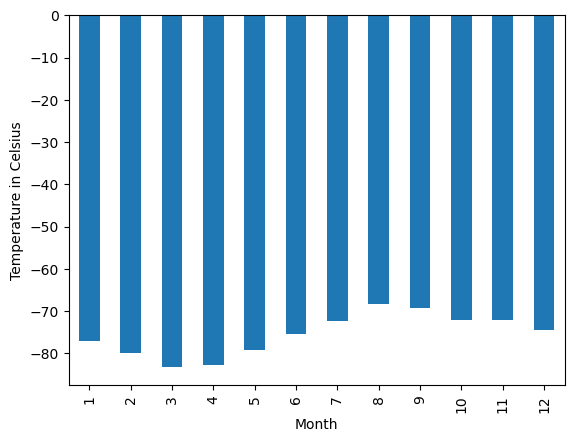

In [36]:
# Plot the average temperature by month
AvgLowTemp.plot.bar()
plt.ylabel("Temperature in Celsius")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

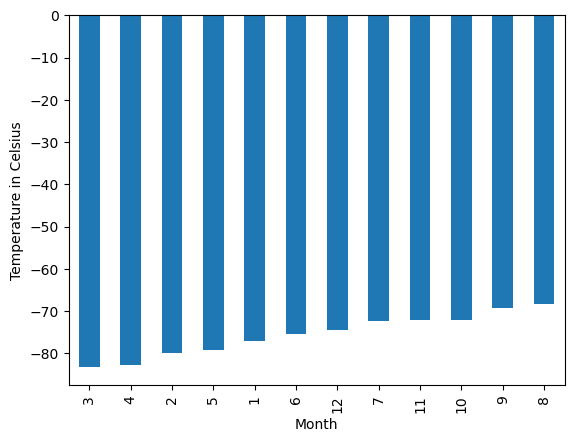

In [37]:
# Identify the coldest and hottest months in Curiosity's location
#Sort values to make visually identifying answer easier
sorted_AvgLowTemp = AvgLowTemp.sort_values()
sorted_AvgLowTemp.plot.bar()
plt.ylabel("Temperature in Celsius")
plt.xlabel("Month")

Martian month 8 is the warmest month with an average temperature of -68.38 degrees C, whilst Martian month 3 was the coldest with an average temperature of -83.31.

In [38]:
# 4. Average pressure by Martian month
#AvgMonthlyPressure series created by grouping original dataframe by month and calculating the mean of pressure
AvgMonthlyPressure = MarsData_df["pressure"].groupby(MarsData_df["month"]).mean()
AvgMonthlyPressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Pressure (mmHg)')

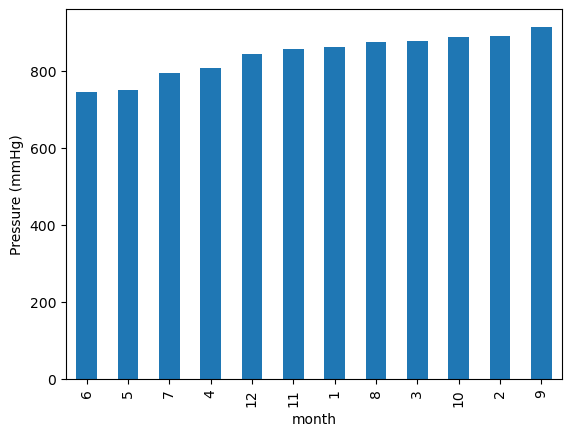

In [39]:
# Plot the average pressure by month
#Sort values to make visually identifying answer easier
sorted_AvgMonthlyPressure = AvgMonthlyPressure.sort_values()
sorted_AvgMonthlyPressure.plot.bar()
plt.ylabel("Pressure (mmHg)")

Martian month 6 has the lowest average atmospheric pressure (745.05 mmHg), Martian month 9 has the highest average atmospheric pressure (913.31 mmHg).

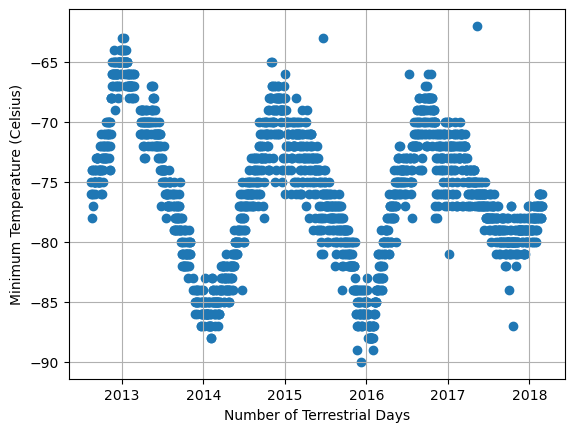

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Extract x and y axis values from dataframe
TerrestrialDays = MarsData_df['terrestrial_date']
MinTemps = MarsData_df['min_temp']

plt.scatter(TerrestrialDays, MinTemps)
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)
plt.show()

The distance from one peak to the next appears to be just under 2 Earth years. Roughly 700 Earth days. The real number of Earth days in a Martian year is 687 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
output_path = "../DataOutput/marsdata.csv"
MarsData_df.to_csv(output_path)

In [42]:
browser.quit()